In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
df=pd.read_csv('train.csv')

In [12]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df=np.array(df) # Converting dataframe into an array
m,n=df.shape # getting the dimensions of array, so m=42000 and n=785
np.random.shuffle(df) # shuffling the data in a random order

data_dev=df[0:1000].T #selects first 1000 rows and transposes it
Y_dev=data_dev[0] # selects the first row so all labels probably?
X_dev=data_dev[1:n] #slicing a row

data_train=df[1000:m].T
Y_train=data_train[0] #all labels again
X_train=data_train[1:n] 
X_train = X_train / 255.
_,m_train = X_train.shape
# X_train's size is 784 X 41000

In [14]:
print(X_train.shape)

(784, 41000)


In [15]:
def init_params():
    W1=np.random.rand(10, 784) - 0.5
    b1=np.random.rand(10,1) -0.5
    W2=np.random.rand(10,10) -0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2
    
def ReLU(Z):
    # ReLU - return x if x>0 and 0 if x<=0
        return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z)) 
    
# Forward propagation : feed forward
def forward_prop(W1,b1,W2,b2,X):
    # a neuron has weight and bias, so the tranisition propagation = wx+b 
    # w.dot(x) does the matrix multiplication
    Z1=W1.dot(X) + b1 
    A1=ReLU(Z1) # adding activation function ReLU - rectified linear func.
    Z2=W2.dot(A1) + b2
    A2=softmax(Z2) # adding activation function for the outputlayer
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
#Backward Propagation
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1=W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    
    # All the functions need ^^

In [16]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y) / Y.size

def gradient_descent(X, Y, iteration, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iteration):
        Z1, A1, Z2, A2= forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2= back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 50 ==0):
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [17]:
W1, b1, W2,b2=gradient_descent(X_train,Y_train,501,0.1)
# This is literally the training process , let's see!


Iteration:  0
[8 8 8 ... 8 8 8] [3 6 1 ... 4 4 9]
Accuracy:  0.10412195121951219
Iteration:  50
[3 2 1 ... 4 4 7] [3 6 1 ... 4 4 9]
Accuracy:  0.40648780487804875
Iteration:  100
[5 6 1 ... 4 4 4] [3 6 1 ... 4 4 9]
Accuracy:  0.6093170731707317
Iteration:  150
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.7023170731707317
Iteration:  200
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.7520487804878049
Iteration:  250
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.7806341463414634
Iteration:  300
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.8001951219512196
Iteration:  350
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.8156097560975609
Iteration:  400
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.8278536585365853
Iteration:  450
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.8368780487804878
Iteration:  500
[5 6 1 ... 4 4 9] [3 6 1 ... 4 4 9]
Accuracy:  0.8441219512195122


In [18]:
print(W1)
print(b1)
print(W2)
print(b2)

[[-0.32021921  0.45174459  0.34254199 ... -0.04653766  0.31895339
   0.3773109 ]
 [-0.00982303 -0.10697811 -0.02269822 ... -0.03317476 -0.3102036
   0.05721045]
 [ 0.25766587 -0.28795213 -0.44279408 ... -0.44849988  0.17051813
  -0.05272055]
 ...
 [ 0.01982403  0.19232223  0.20349604 ... -0.11703431  0.39481941
  -0.25136906]
 [-0.44309826 -0.07509816  0.48209026 ... -0.28767078 -0.0839281
   0.22114639]
 [-0.41901771  0.13109547 -0.30485188 ... -0.20938446  0.26157988
  -0.13263173]]
[[0.8967001 ]
 [0.16654739]
 [0.5518526 ]
 [0.45684385]
 [0.29334685]
 [0.50793529]
 [0.74316058]
 [0.70301315]
 [0.26358905]
 [0.16824374]]
[[ 1.98231993e-01  1.61831142e-01  2.29381151e-01  5.43890199e-02
  -2.76248869e-01 -3.43517963e-01  5.22712892e-01 -5.46684953e-01
  -8.64169372e-01  6.64880514e-01]
 [-3.44026532e-01  5.94638308e-02 -3.03218323e-01 -1.62095005e-02
  -6.07930673e-01  1.71361554e-01 -8.67470897e-01 -3.21322842e-01
   1.02821554e+00 -4.06271637e-01]
 [-2.98304885e-01  1.76024345e-01  

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


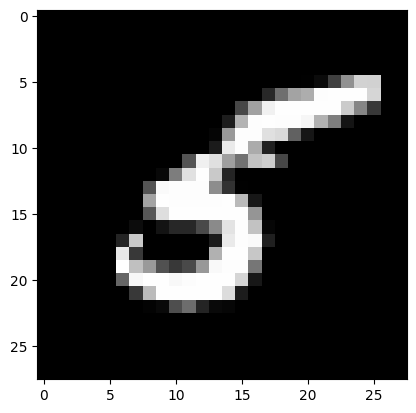

Prediction:  [6]
Label:  6


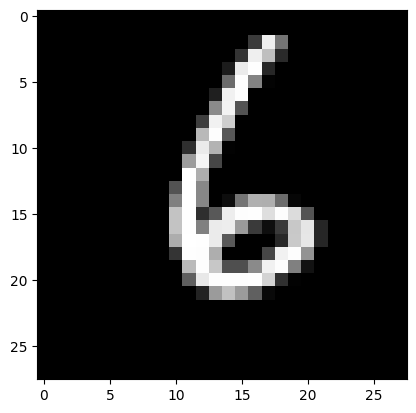

Prediction:  [1]
Label:  1


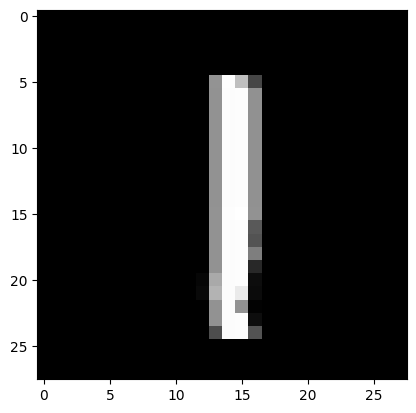

Prediction:  [1]
Label:  1


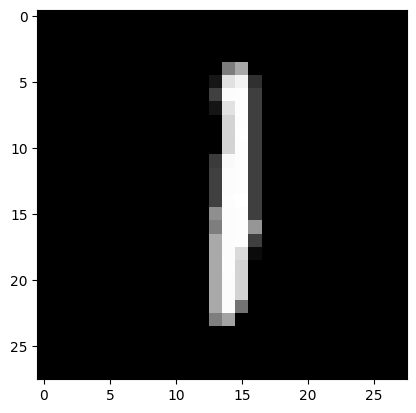

In [22]:
test_prediction(425, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 2 2 1 0 4 0 2 7 2 4 1 4 4 0 0 0 1 3 7 7 4 0 0 3 3 4 2 8 1 3 4 0 4 2 0 3
 3 5 2 0 0 1 4 2 2 2 3 1 4 1 0 4 9 7 1 2 2 0 1 2 0 5 0 4 0 0 2 4 1 5 3 4 3
 1 5 1 2 7 3 0 4 7 0 0 4 7 0 3 3 1 7 3 0 4 4 5 9 3 0 5 3 1 3 1 0 1 2 0 2 0
 3 2 2 1 2 0 0 7 2 2 3 0 0 3 1 4 4 2 3 2 4 3 3 0 4 0 1 0 4 7 0 4 7 5 5 0 8
 0 1 2 4 2 0 2 2 2 5 0 2 1 4 3 3 4 4 3 0 2 3 0 7 0 3 3 0 7 4 1 1 2 7 4 1 3
 4 4 4 3 2 0 8 0 2 7 2 1 0 1 2 3 6 3 7 0 3 3 5 1 4 1 0 7 3 4 0 1 4 0 4 0 1
 0 2 0 4 0 2 1 5 3 1 4 2 3 1 1 3 0 0 4 5 4 2 7 3 3 8 3 4 3 0 3 4 2 1 4 3 2
 0 1 4 1 4 0 0 1 5 5 0 2 7 0 0 4 8 1 1 4 4 1 0 4 3 7 8 7 0 0 0 0 7 8 0 0 0
 4 3 3 3 4 2 2 4 2 1 2 0 0 0 4 4 2 7 7 0 1 4 4 0 0 8 4 4 2 0 7 0 2 2 0 1 7
 2 7 1 1 1 1 2 7 4 3 2 4 2 0 9 5 2 1 3 2 0 2 8 1 0 3 3 1 8 4 4 0 3 2 1 4 3
 4 0 0 0 4 2 4 1 1 0 1 1 7 4 0 2 5 4 1 2 7 4 4 0 8 0 4 2 1 7 7 7 0 1 1 3 0
 5 0 7 5 1 0 7 4 9 0 7 0 3 1 4 7 7 2 3 0 1 0 1 7 5 0 3 4 7 5 4 3 1 7 2 0 9
 0 2 5 4 2 4 0 1 0 3 2 4 0 3 4 5 0 0 0 7 2 1 0 4 0 0 3 2 0 5 1 5 3 1 1 2 4
 4 4 1 4 1 7 1 1 3 6 7 2 

C:\Users\joshn\AppData\Local\Temp\ipykernel_13552\2025042256.py:13: RuntimeWarning: overflow encountered in exp
  return np.exp(Z) / sum(np.exp(Z))
C:\Users\joshn\AppData\Local\Temp\ipykernel_13552\2025042256.py:13: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z) / sum(np.exp(Z))


0.555